In [2]:
from skimage import io
import matplotlib.pyplot as plt

In [3]:
img = io.imread('C:\Code\OpenCV\DigitalSreeni\Fuckyou.jpg', as_gray=True)

### Reshape

In [4]:
from skimage.transform import rescale,resize,downscale_local_mean

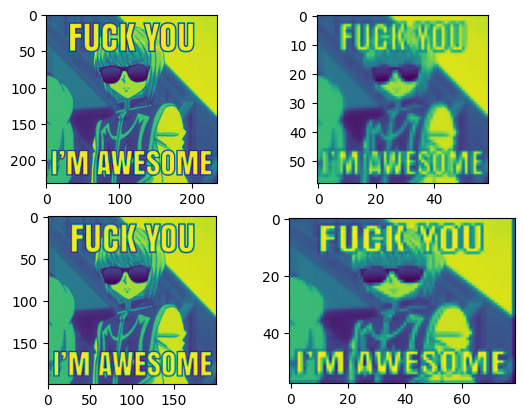

In [17]:
rescaled_img = rescale(img, 1.0/4.0, anti_aliasing=True)
resized_img = resize(img, (200,200))
downscaled_img = downscale_local_mean(img, (4,3))

plt.subplot(2,2,1)
plt.imshow(img)
plt.subplot(2,2,2)
plt.imshow(rescaled_img)
plt.subplot(2,2,3)
plt.imshow(resized_img)
plt.subplot(2,2,4)
plt.imshow(downscaled_img)

### Edge detection

In [18]:
from skimage.filters import roberts, sobel, scharr, prewitt

In [28]:
edge_roberts = roberts(img)
edge_sobel = sobel(img)
edge_scharr = scharr(img)
edge_prewitt = prewitt(img)

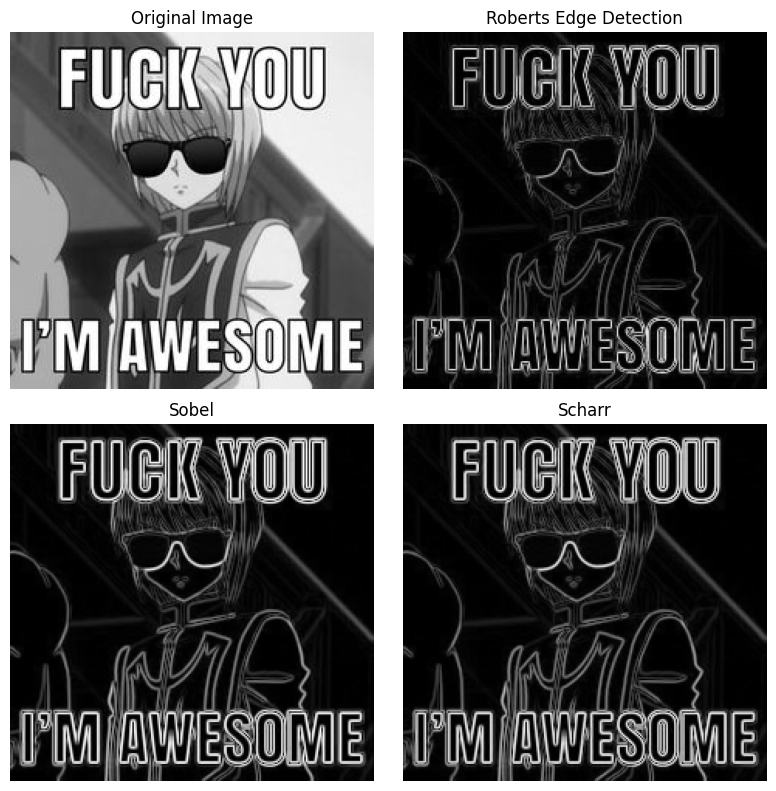

In [30]:
fig, axes = plt.subplots(nrows= 2, ncols =2, sharex=True, figsize=(8,8))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original Image')

ax[1].imshow(edge_roberts, cmap=plt.cm.gray)
ax[1].set_title('Roberts Edge Detection')

ax[2].imshow(edge_sobel, cmap=plt.cm.gray)
ax[2].set_title('Sobel')

ax[3].imshow(edge_scharr, cmap=plt.cm.gray)
ax[3].set_title('Scharr')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

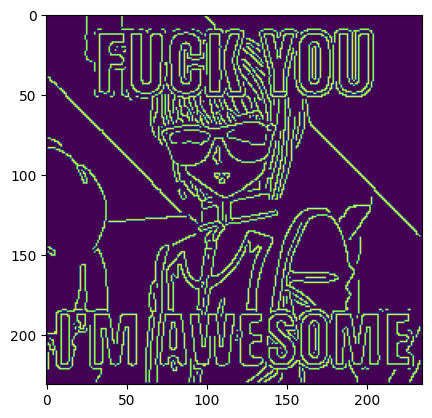

In [33]:
from skimage.feature import canny
edge_canny = canny(img, sigma =1)
plt.imshow(edge_canny)

### Point spread function
(mức độ phân tán điểm ảnh --> khôi phục ảnh (giảm nhiễu))

[[0.003765   0.015019   0.02379159 0.015019   0.003765  ]
 [0.015019   0.05991246 0.0949073  0.05991246 0.015019  ]
 [0.02379159 0.0949073  0.15034262 0.0949073  0.02379159]
 [0.015019   0.05991246 0.0949073  0.05991246 0.015019  ]
 [0.003765   0.015019   0.02379159 0.015019   0.003765  ]]


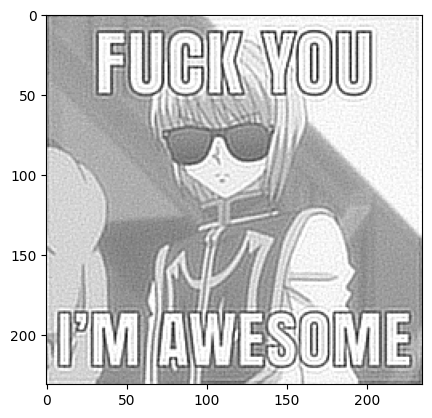

In [37]:
from skimage import restoration
import numpy as np
import scipy.stats as st

def gkern(kernlen=21, nsig=2):
    lim = kernlen//2 + (kernlen %2)/2
    x = np.linspace(-lim,lim,kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()

psf = gkern(5,3)
print(psf)

deconvolved, _ = restoration.unsupervised_wiener(img, psf)

plt.imshow(deconvolved, cmap='gray')


### Entropy Filter

In [64]:
from skimage.filters.rank import entropy
from skimage.morphology import disk

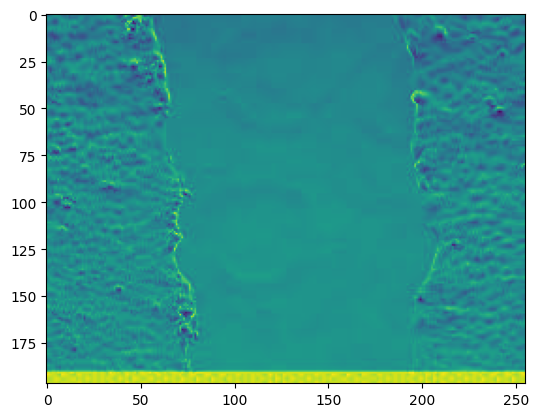

In [146]:
img1 = io.imread('Cell.jpg', as_gray=True)
plt.imshow(img1)

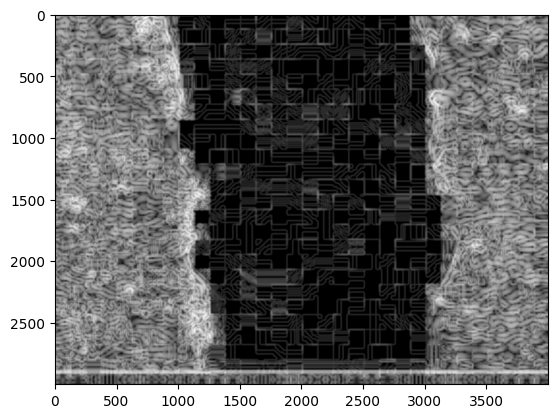

In [142]:
entropy_img = entropy(resized_img, disk(10))
plt.imshow(entropy_img, cmap='gray')

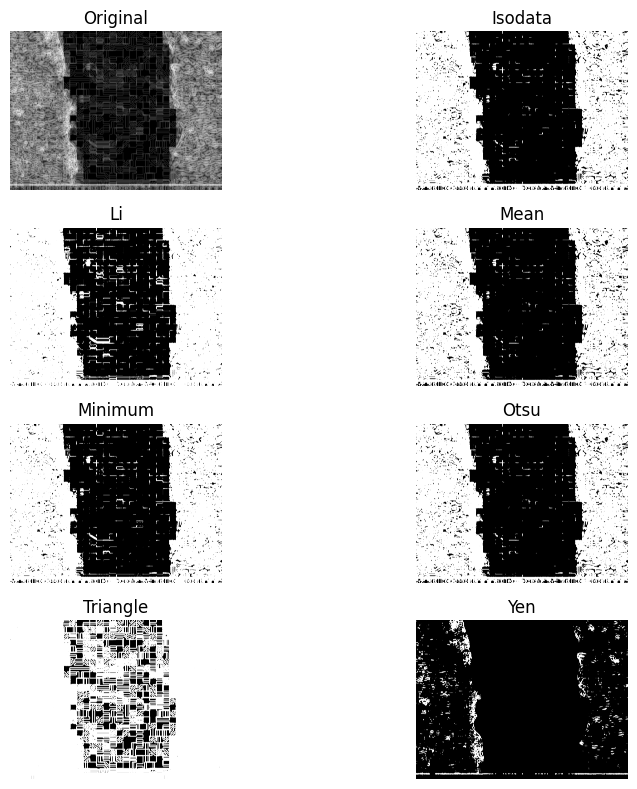

In [143]:
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(entropy_img, figsize=(10,8), verbose=False)
plt.show()

In [144]:
from skimage.filters import threshold_otsu
thresh = threshold_otsu(entropy_img)
print(thresh.size)
print(thresh)

1
2.077150805829867


[[False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
The percent bright pixels is: 48.687508333333334


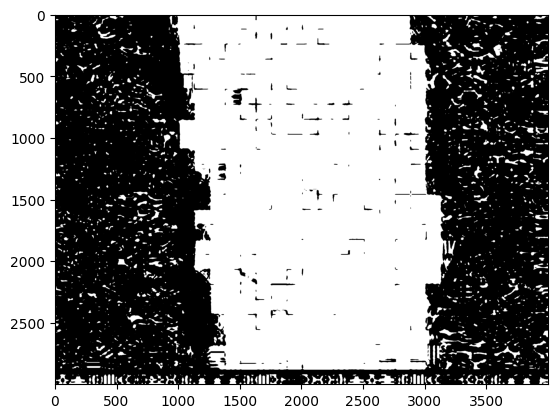

In [145]:
binary = entropy_img <= thresh
print(binary)
plt.imshow(binary, cmap='gray')
print('The percent bright pixels is:', 
      np.sum(binary==1)*100 / (np.sum(binary==0) + np.sum(binary==1)))